In [ ]:
pip install --upgrade pip

In [ ]:
pip install tensorflow[and-cuda]

In [ ]:
pip install librosa

In [ ]:
pip install --update pip

In [ ]:
pip install keras

In [ ]:
pip install soundfile

# I. Creation of the database (training, test, evaluation dataset):

In [52]:
import numpy as np
import soundfile as sf
import IPython 
import random as rd
import os
import librosa
import matplotlib.pyplot as plt

In [ ]:
import keras

## A. Gathering signals data:

In [3]:
#Not perfect: here we only select datas from 1st folders.
def get_files_from_directories(path_data_folder = "./data"):
    list_audio_files = [path_data_folder]
    while os.path.isdir(list_audio_files[0]):
        origin_dir = list_audio_files[0]
        list_files_dir = os.listdir(origin_dir)
        list_audio_files = [origin_dir + "/" + list_files_dir[i] for i in range(len(list_files_dir))]
    print(f"We found {len(list_audio_files)} files")
    return list_audio_files

In [ ]:
# Utile pour écouter l'audio : IPython.display.Audio(signal_test , rate = sample_rate)

In [4]:
list_audio_files = get_files_from_directories()

We found 16 files


In [5]:
signal_test_0 , sr0 = sf.read(list_audio_files[0])
signal_test_1 , sr1 = sf.read(list_audio_files[1])
print(f"sample_rate_0 = {sr0} , sample_rate_1 = {sr1}")

sample_rate_0 = 16000 , sample_rate_1 = 16000


In [7]:
IPython.display.Audio(signal_test_0, rate = sr1)

## B. Creating noisy signals

In [ ]:
# Chose a random moment in the noise
# UN RANDOM DANS CETTE FONCTION
def random_noise_start(noise):
    noise_resize = np.resize(noise, 2 * len(noise))
    random_start = rd.randint(0,len(noise))
    new_noise = noise_resize[random_start : random_start + len(noise)]
    return new_noise

In [ ]:
# make a superposition of noises. 
# UN RANDOM DANS CETTE FONCTION
def create_superpose_noise( noise , random_nb_superposition = True, nb_superposition = None):
    if random_nb_superposition:
        nb_superposition = rd.randint(1,4)
    print(f"We used a superposition of {nb_superposition} noise(s)")

    superpose_noise = random_noise_start(noise)
    for i in range(nb_superposition-1):
        superpose_noise += random_noise_start(noise)
    superpose_noise = (1/nb_superposition)*superpose_noise
    return superpose_noise

In [ ]:
def create_noisy_signal(clean_audio,noise, alpha, random_nb_superposition = True, nb_superposition = None):
    superpose_noise = create_superpose_noise(noise,random_nb_superposition = random_nb_superposition, nb_superposition = nb_superposition)
    noisy_signal = clean_audio + alpha*np.resize(superpose_noise, len(clean_audio))
    return noisy_signal, superpose_noise

**Adding noise:** We want to add different noises on our audio
- 1: Chose a random moment in the noise 
- 2: Make a superposition of the noises 
- 3: Chose an alpha coef to the noise


In [44]:
path_noise_file = "./data/noise.wav"
noise,samplerate = sf.read(path_noise_file)
print(samplerate, noise.shape)

16000 (3763687,)


In [84]:
noise_test0 , noisy_signal_test0 = create_noisy_signal(signal_test_0,noise, alpha = 0.9)

We used a superposition of 2 noise(s)


In [94]:
#test 
#IPython.display.Audio(signal_test_0, rate = sr0)

In [95]:
#IPython.display.Audio(noisy_signal_test0, rate = sr0)

In [96]:
#IPython.display.Audio(noise_test0, rate = sr0)

# Last step, compute the RSB. 

In [99]:
#Calcul puissance du signal
signal_stft_abs = np.abs(signal_test_0)**2
signal_stft_abs.shape

(93680,)

# II. Implementation of the training 

In [47]:
def display_spectogramm(signal):
    signal_stft_abs = np.abs(signal)**2
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(signal_stft_abs,ref=np.max),y_axis='log', x_axis='time', ax=ax)
    ax.set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [48]:
# First we made the STFT of the signal
signal_stft_test_0 = librosa.stft(signal_test_0)
signal_stft_test_1 = librosa.stft(signal_test_1)
noisy_signal_stft_0 = librosa.stft(noisy_signal_0)
noisy_signal_stft_1 = librosa.stft(noisy_signal_1)

In [49]:
# Creation of the mask. if /s/^2 > /u/^2 M = 1, 0 otherwise
signal_abs = np.abs(signal_stft_test_0)**1
noise_abs = np.abs(noisy_signal_stft_0)**1
mask = np.zeros(np.shape(signal_abs))
test = 0
for i in range (np.shape(signal_abs)[0]):
    for j in range(np.shape(signal_abs)[1]):
        if (signal_abs[i,j] > noise_abs[i,j]):
            test+=1
            mask[i,j] = 1
print(test)

34536


In [50]:
test = signal_abs - mask

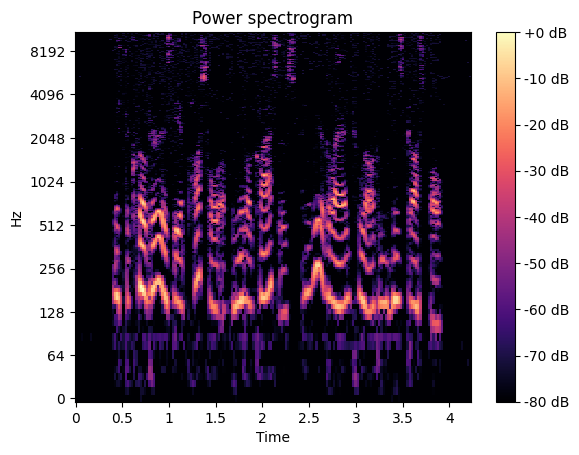

In [53]:
display_spectogramm(test)

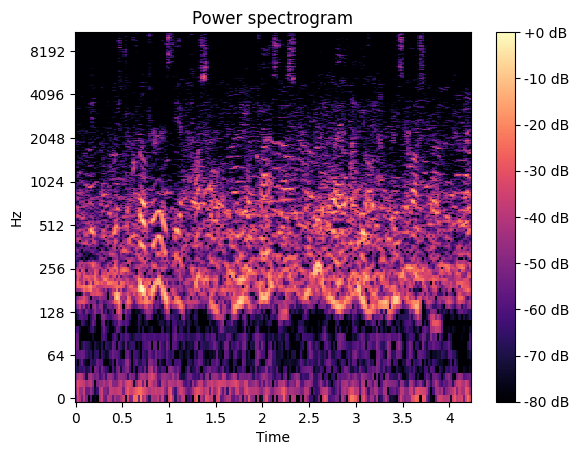

In [54]:
display_spectogramm(noise_abs)

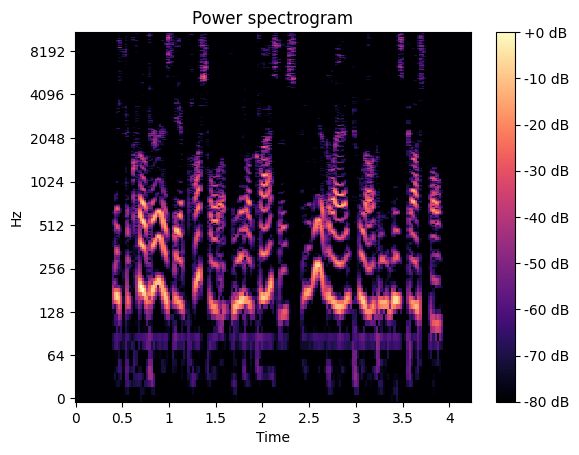

In [55]:
display_spectogramm(signal_abs)

# test concluant, il faut maintenant mettre en place une fonction de coût!
Ensuite mettre en place les datasets 
enfin créer une première architecture de réseau de neurones. 